# BUS 280 - *k*-Nearest Neighbors
Python Demonstration
* John A. Michl
* March 23, 2022

Note: This demonstration will cover a number of topics completed in Python.
1. Accessing and exploring a common dataset in Bunch format
2. Basic plotting in Matplotlib to examine the data set
3. Setup of a test and train environment
4. Selection of an appropriate *k* value
5. Application of that value to create the model and predict values

Modules and libraries used include:
* `sklearn`  - for dataset and data mining
* `pandas` - for basic data management for plotting
* `matplotlib` - for basic plotting

**NOTE:** Some lines of code missing so that students can practice adding code.

## The Iris Dataset
* Dataset created in the 1930s
* Frequently used to demonstrate machine learning
* 150 observations of three species of iris (50 observations each)
* Features include sepal length and width, petal length and width
https://en.wikipedia.org/wiki/Iris_flower_data_set

In [130]:
# import dependencies, modules and magics

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
%config InlineBackend.figure_format = 'retina'

## `SciKitLearn` datasets
* `SciKitLearn` has several built-in datasets for learning machine learning techniques.
* They import as a **Bunch object**.
* Similar to a Python dictionary that has key:value pairs.
* First, we'll look at the entire object.
* Then, we'll attempt to look at the values for certain keys.

In [131]:
# import the iris dataset and asign it to an object
# scroll through the entire ouput
iris = datasets.load_iris()

In [132]:
# View object type
type(iris)

sklearn.utils.Bunch

In [133]:
# View Bunch object contents, appears to be a dictionary of arrays and more
iris  

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [134]:
# print what keys are in the Bunch object
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [135]:
# show just the data
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [136]:
# print just the target values


In [137]:
# print just the feature_names, note this is a [list]


In [138]:
# print just the target_names, note this is a [list]
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [139]:
# print just the DESCR  (case is important!)



## Convert the `Bunch` object to a `DataFrame`
* DataFrame is a data structure similar to a spreadsheet
* Rows will be observations
* Columns (a.k.a. `Series`) are features (or variables)
* Column names will be the feature_names
* Start by converting the data
* Then append the target array
* Finally add a column for the species name

This will make it easy for us to do some basic plotting. 

In [140]:
# convert to dataframe
# the words data and columns are known as kwarg, keyword arguments
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [141]:
df.head()   # print the head of the data frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [142]:
# add the target array to the previously created df
df["target"] = iris.target  # add new column using target array

In [143]:
df.head()   # print the head of the data frame, notice the new column

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [144]:
# create a new series called species
# it will be the name associated with target value
# map the actual species name into the df for ease of view

df['species']= df['target'].map({0:'setosa',1:'versicolor',2:'virginica'})

df  # print head and tail

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [146]:
# optional export data frame to a csv file
df.to_csv('iris.csv')

## Plot some basic scatter diagrams with `matplotlib`
* `matplotlib` is a well known plotting module for Python.
* It can be tricky to learn but it very powerful.
* It forms the backbone for most plotting packages in Python.
* Scatter diagrams have individual plots combined on one figure.

In [101]:
# create two lists to be used later
colormap = ['r', 'g', 'b']           # three colors - red, green, blue
markermap = ["o","^","s"]            # three marker styles

# lists have elements starting with position 0
# print out the item in position 1 of the markermap list
markermap[1]

'^'

In [102]:
# Python loops and range method with an integer
# Python loops go to n-1 in a range so for the loop below
# i will first equal 0, then 1, then 2

for i in range(0,3):
    print(colormap[i])

r
g
b


In [94]:
# looping through an object
print("Elements: ",len(markermap))
print()

for marker in markermap:
    print(marker)

print()
for i, marker in enumerate(markermap):
    print(i, marker)

Elements:  3

o
^
s

0 o
1 ^
2 s


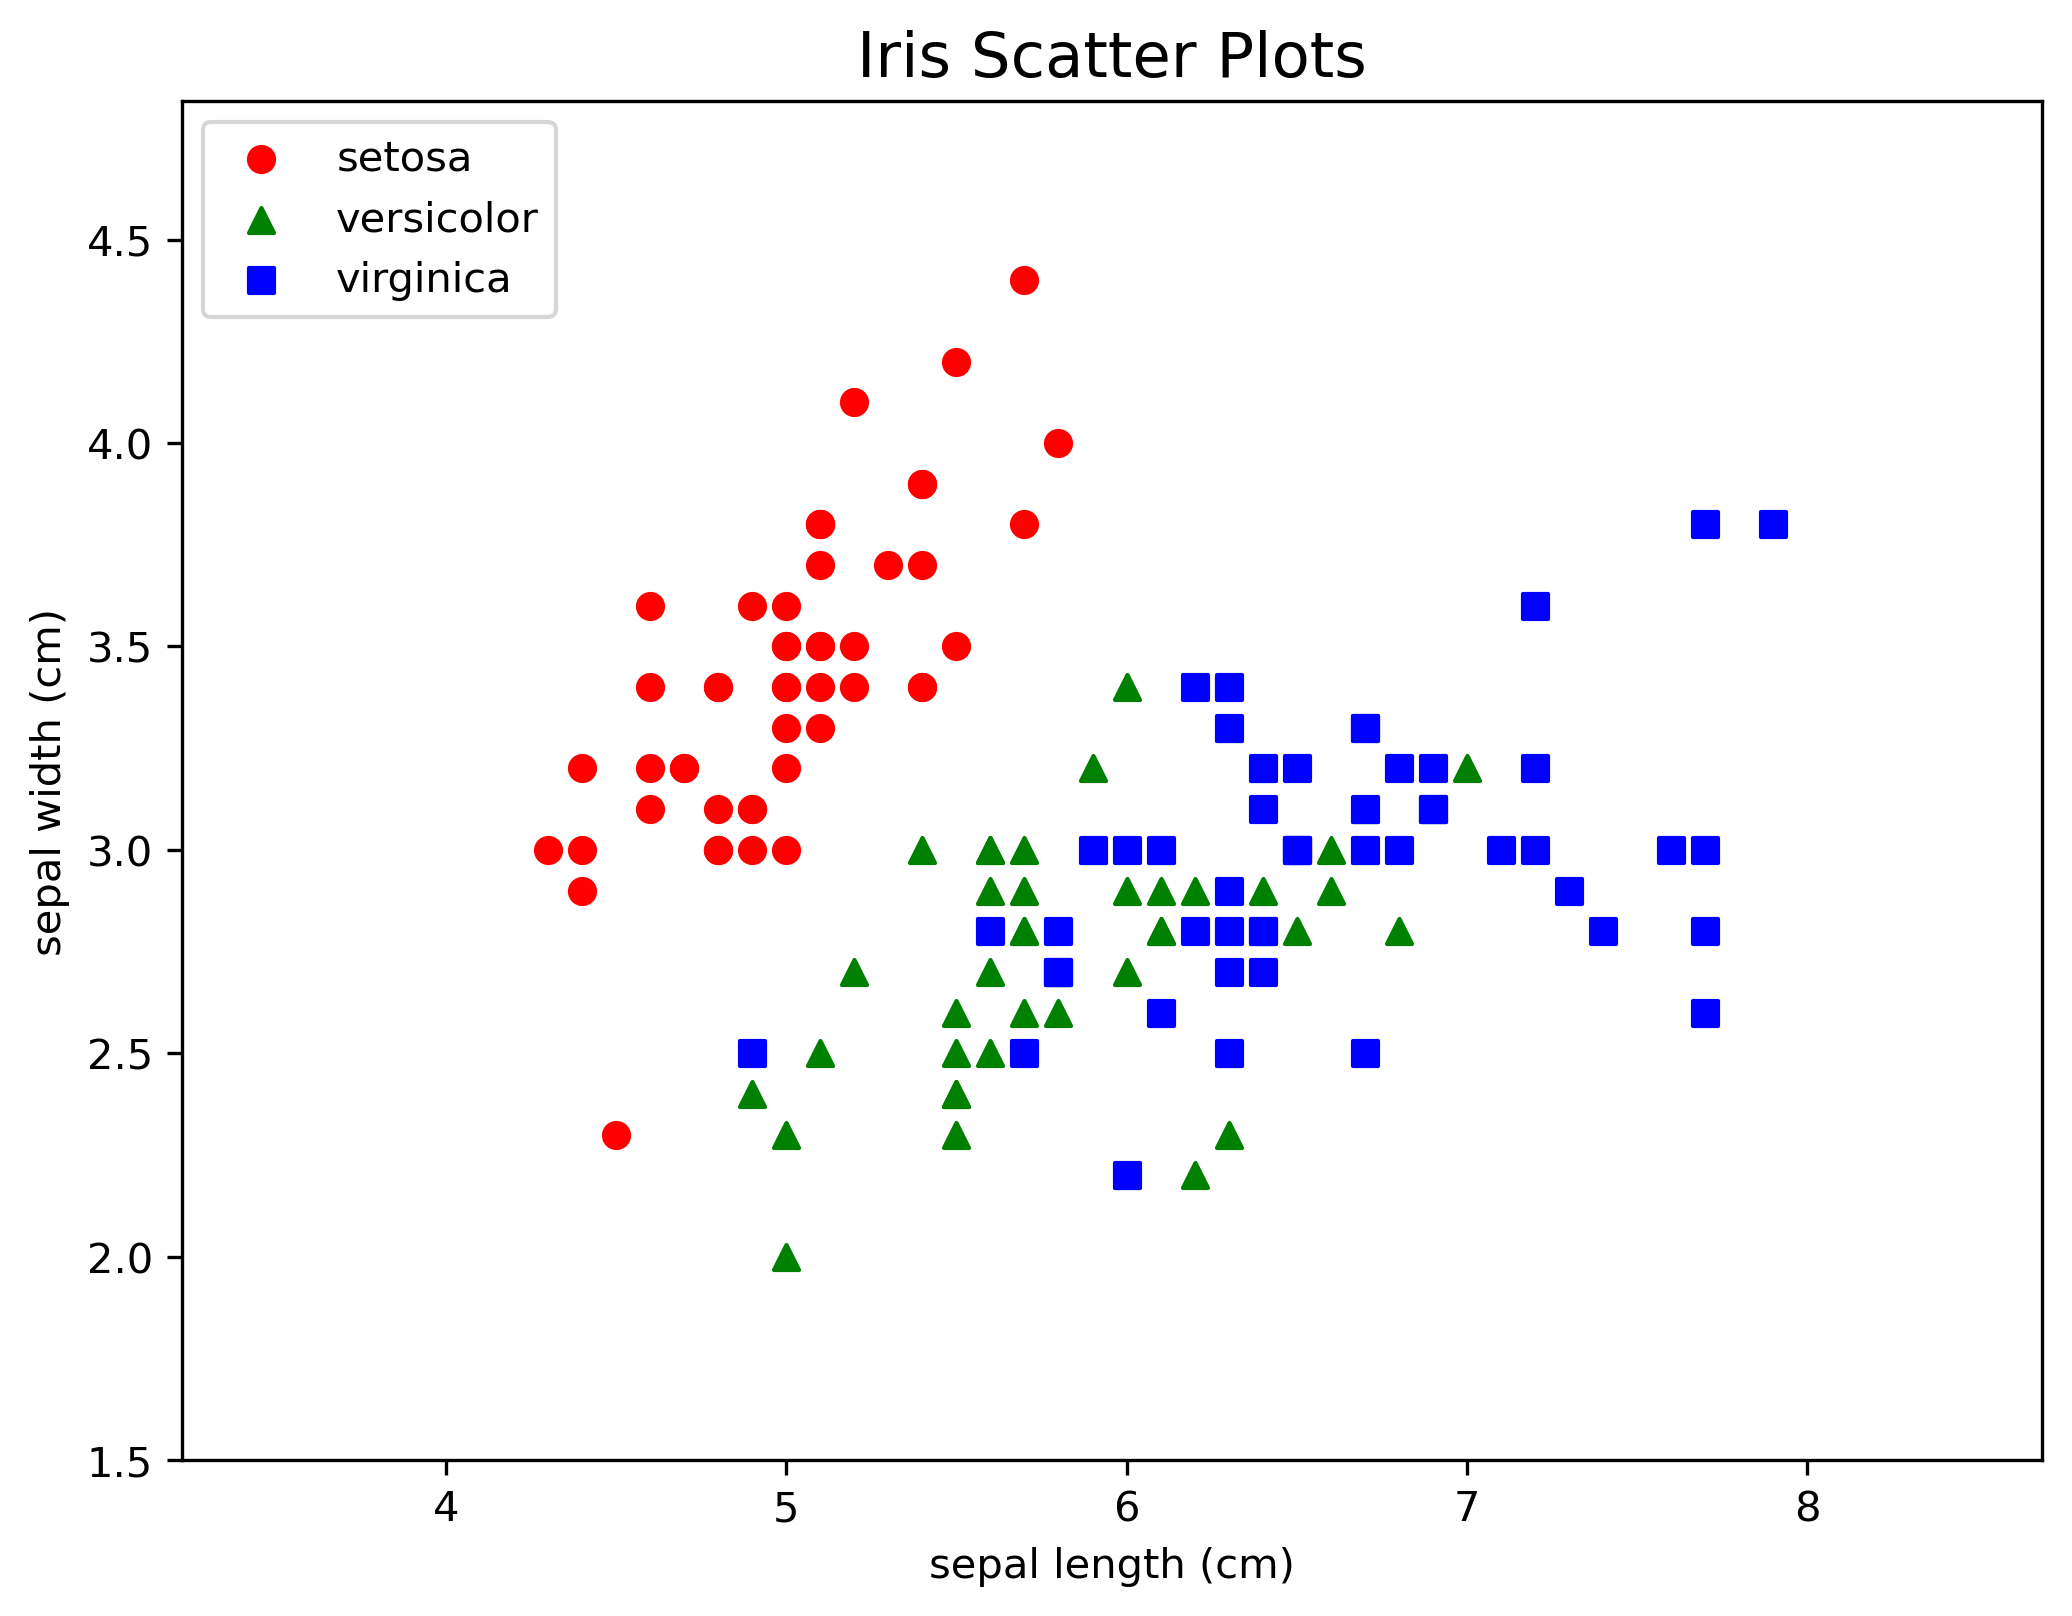

In [96]:
# Set a style info
plt.style.context('seaborn-white')   # default style

# Create figure and axis objects on which we'll plot
fig, ax = plt.subplots(figsize =(8,6), dpi=150)

# Loop three times to create three plots
# note that i is used to pull the correct data and labels

for i in range(0,3):
    ax.scatter(data=df[df['target']==i], 
           x='sepal length (cm)', 
           y='sepal width (cm)',
           c=colormap[i],
           marker=markermap[i],
           label = iris.target_names[i]
          )

# Add some details to the plot
plt.title('Iris Scatter Plots', fontsize = 15)   # title
plt.xlabel('sepal length (cm)', fontsize = 10)   # x-axis title
ax.set_ylabel('sepal width (cm)', fontsize = 10) # alt method for y-axis
plt.legend(loc ='upper left')    # add legend and location

# set axis limits based on data
plt.xlim(df['sepal length (cm)'].min() * .75, df['sepal length (cm)'].max() * 1.1)
plt.ylim(df['sepal width (cm)'].min() * .75, df['sepal width (cm)'].max() * 1.1);

## *k*-Nearest Neighbor Algorithm
* Simple supervised classification algorithm.
* Allows assignment of a 'class' to a new data point by looking at close neighbors.
* *k* represents the number of neighbors.
* 

In [97]:
# assign data to training (X) and target (y)

X = iris.data
y = iris.target

# print out the shape of the training arrays
print("X:", X.shape)   # 150 observations, 4 features
print("y:", y.shape)   # 150 observations, 1 outcome to predict

X: (150, 4)
y: (150,)


### Train the model
* Import sklearn's train_test_split module.
* Name the new sets.
* Pass to it the objects.
* Pass a test size and random state for reproducability.
* Create the train and test sets.

In [105]:
from sklearn.model_selection import train_test_split   # import module step
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [106]:
# view shape of the new train objects
print("X train:", X_train.shape)
# add one line for y_train, case matters


X train: (120, 4)


In [ ]:
# view shape of the new test objects
# add two lines for test



In [110]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)    # these are the values of k to be tested

scores = {}             # create empty dictionary for score pairs
scores_list = []        # create empty list for just scores for plot

for k in k_range:  # loop through the values of k
        knn = KNeighborsClassifier(n_neighbors=k)  # run knn for each value of k
        knn.fit(X_train,y_train)  # fit the model for current value of k
        y_pred=knn.predict(X_test)    # create predictions for current value of k
        scores[k] = metrics.accuracy_score(y_test,y_pred) # add results to dictionary
        scores_list.append(metrics.accuracy_score(y_test,y_pred)) # append to scores_list for chart

In [111]:
# Show testing accuracy for each value of k
# note this is a dictionary object with key:value pairs
# key is the unique value of k; value is the test accuracy
scores

{1: 0.9333333333333333,
 2: 0.9333333333333333,
 3: 0.9666666666666667,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 0.9666666666666667,
 7: 0.9666666666666667,
 8: 0.9666666666666667,
 9: 0.9666666666666667,
 10: 0.9666666666666667,
 11: 0.9666666666666667,
 12: 0.9666666666666667,
 13: 0.9666666666666667,
 14: 0.9666666666666667,
 15: 0.9666666666666667,
 16: 0.9666666666666667,
 17: 0.9666666666666667,
 18: 0.9666666666666667,
 19: 0.9666666666666667,
 20: 0.9333333333333333,
 21: 0.9666666666666667,
 22: 0.9333333333333333,
 23: 0.9666666666666667,
 24: 0.9666666666666667,
 25: 0.9666666666666667}

Text(0, 0.5, 'Testing Accuracy')

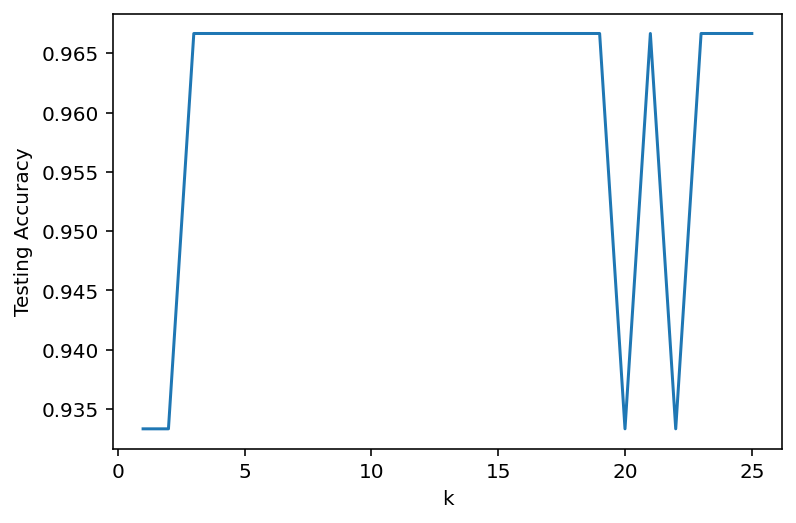

In [113]:
# plot the relationship between k and the testing accuracy
# plot is easier to view than the list of numbers
plt.plot(k_range,scores_list)    # note the list
plt.xlabel('k')
plt.ylabel('Testing Accuracy')

It appears that most values of k have the same testing accuracy of 96.66%. Technically, we could pick any one of those for our model. Let's use 5.

### *k* = 5 to run the model 

In [117]:
# Create the knn algorithm
# Choose a value of k and assign it to the k variable

k = 5

# create a knn object that will 
knn = KNeighborsClassifier(n_neighbors=k)   # could have hard coded k, too

# use the fit() method to train the model
knn.fit(X,y)

KNeighborsClassifier()

In [123]:
# Feed some new data to predict each class
# create a list of lists of new measures
x_new = [[5,3,5,4],
         [3,4,5,2],
         [5,4,2.5,2]]

# feed that list to the prediction engine of knn object
y_predict = knn.predict(x_new)

# set target names to a list for easy reference later
classes = iris.target_names

# print out the predictions
for i in range(0,len(x_new)):   # loop through the x_new list
    print(y_predict[i],classes[y_predict[i]])  # i represents the new data, and the predicted class

2 virginica
1 versicolor
0 setosa


In [125]:
y_predict[2]   # demonstrate value of i represents prediction

0